# мне нужен Nav1.7
https://sci-hub.ru/10.1212/WNL.0000000000001382

https://physoc.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1113%2Fjphysiol.2006.127027&file=TJP2222_suppl_mat.pdf

https://physoc.onlinelibrary.wiley.com/doi/10.1113/jphysiol.2006.127027

# Kv1.1

In [1]:
import scienceplots

from brian2 import *

prefs.codegen.target = "numpy"
plt.style.use(["science", "no-latex"])

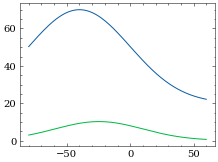

In [40]:
vv = linspace(-80, 60, 1000)

weird = 20 + 50 * exp(-((vv + 40)**2) / (2*40**2))
nonweird = 0.25 + 10.04 * exp(-((vv + 24.67)**2)/ (2*34.8**2))
plot(vv, weird, vv, nonweird)

In [2]:
# Equations
base_eqs = Equations("""
dv/dt = (- gl * (v - El) - IK - INa - INa18 - IKa + I) / Cm : volt
I : ampere
""")
# Kv1.1
gK_eq = Equations("""
IK = _gK * m * h**2 * (v - EK) : ampere

dm/dt = (m0 - m) / m_tau : 1
m0 = 1 / (1 + exp((v/mV + 30.5)/-11.4)) : 1
m_tau = 30*ms / (1 + exp((v/mV + 76.56)/26.15)) : second

dh/dt = (h0 - h) / h_tau : 1
h0 = 1 / (1 + exp((v/mV + 30)/27.4)) : 1
h_tau = 15_000*ms / (1 + exp((v/mV + 160.56)/-100.)) : second
""")
gK_eq_or = Equations("""
IK = _gK * n**4 * (v - EK) : ampere
n_inf = 1 / (1 + exp(-(v/mV + 35)/15.4)) : 1
ntau_l = 1000*ms * (.000688 + 1 / (exp((v/mV + 75.2)/6.5) + exp((v/mV - 131.5)/(-34.8)))) : second
ntau_m = 0.16*ms + 0.8*ms * exp(-0.0267 * (v/mV + 11)) : second
tau_n = int(v/mV < -31) * ntau_l + int(v/mV >= -31) * ntau_m : second
dn/dt = (n_inf - n) / tau_n : 1
""",
    n="nK", n_inf="nK_inf", tau_n="tau_nK")
# Ka
gKa_eq = Equations("""
IKa = _gKa * n * h * (v - EK) : ampere

n_inf = (1 / (1 + exp(-(v/mV + 5.4)/16.4)))**4 : 1
tau_n = (.25*ms + 10.04*ms * exp(-((v/mV + 24.76)**2) / (2*34.8**2))) : second
dn/dt = (n_inf - n) / tau_n : 1
h_inf = 1 / (1 + exp((v/mV + 49.9)/4.6)) : 1
tau_h_ = (20*ms + 50*ms * exp(-((v/mV + 40)**2) / (2*40**2))) : second
tau_h = tau_h_*int(tau_h_ > 5*ms) + 5*ms*int(tau_h_ <= 5*ms) : second  # warning
dh/dt = (h_inf - h) / tau_h : 1
""",
    n="nKa", h="hKa",
    n_inf="nKa_inf", tau_n="tau_nKa",
    h_inf="hKa_inf", tau_h="tau_hKa")
# Nav1.7
gNa_eq = Equations("""
INa = _gNa * m**3 * h * s * (v - ENa) : ampere

alpha_m = 15.5 / (1 + exp((v/mV - 5)/(-12.08))) / ms : Hz
beta_m = 35.2 / (1 + exp((v/mV + 72.7) / 16.7 )) / ms : Hz
m_inf = alpha_m / (alpha_m + beta_m) : 1
tau_m = 1 / (alpha_m + beta_m) : second
dm/dt = (m_inf - m) / tau_m : 1

alpha_h = 0.39 / (1 + exp((v/mV + 122.35)/15.3)) / ms : Hz
beta_h = -.00283/ms + 2.00283 / (1 + exp((v/mV + 5.53)/(-12.7))) / ms : Hz
h_inf = alpha_h / (alpha_h + beta_h) : 1
tau_h = 1 / (alpha_h + beta_h) : second
dh/dt = (h_inf - h) / tau_h : 1

alpha_s = 0.00003/ms + (0.00092)/(1 + exp((v/mV + 93.9)/16.6)) / ms : Hz
beta_s = 132.05/ms - 132.05 / (1 + exp((v/mV - 384.9)/28.5)) / ms : Hz
s_inf = alpha_s / (alpha_s + beta_s) : 1
tau_s = 1 / (alpha_s + beta_s) : second
ds/dt = (s_inf - s) / tau_s : 1
""", m='mNa', h='hNa', s='sNa',
     tau_h='tau_hNa', h_inf='hNa_inf',
     tau_m='tau_mNa', m_inf='mNa_inf',
     tau_s='tau_sNa', s_inf='sNa_inf')
# gNa18
gNa18_eq = Equations("""
INa18 = _gNa18 * m**3 * h * (v - ENa) : ampere

alpha_m = 2.85/ms - 2.84 / (1 + exp((v/mV - 1.16)/13.95)) / ms : Hz
beta_m = 7.62 / (1 + exp((v/mV + 46.5)/8.83)) / ms : Hz
m_inf = alpha_m / (alpha_m + beta_m) : 1
tau_m = 1 / (alpha_m + beta_m) : second
dm/dt = (m_inf - m) / tau_m : 1

tau_h = 1.218*ms + 42. * exp(-((v/mV + 38.1)**2) / (2*15.2**2))*ms : second
h_inf = 1 / (1 + exp((v/mV + 32.2)/4)) : 1
dh/dt = (h_inf - h) / tau_h : 1
""",
    m="mNa18", h="hNa18",
    alpha_m="amNa18", beta_m="bmNa18", tau_m="tau_mNa18", m_inf="mNa18_inf",
    tau_h="tau_hNa18", h_inf="hNa18_inf"
)

In [17]:
length = 37*um
radi = 20*um
ar = length * 2 * pi * radi
print(ar)

4649.55712731 um^2


In [18]:
#area = 3000*um**2
area = length * 2 * pi * radi
_gK = 0.018 * siemens/cm**2 * area
print(_gK)
_gNa = 0.038 * siemens/cm**2 * area
print(_gNa)
_gNa18 = 0.12 * siemens/cm**2 * area
print(_gNa18)
_gKa = 0.07 * siemens/cm**2 * area
print(_gKa)
gl = 0.0000425 * siemens/cm**2 * area  # what if this is wrong?
#gl = gl * 10
print(gl)

0.83692028 uS
1.76683171 uS
5.57946855 uS
3.25468999 uS
1.97606178 nS


In [38]:
start_scope()
defaultclock.dt = 10 * us

#gl = 1.275 * nS  # arbitrary, in order of examples
El = -55 * mV
#_gK = 18 * nS  # from HH brian example
EK = -68.5 * mV  # channel pedia
Cm = 24.3 * pF  # from HH brian example
ENa = 63.4 * mV
#_gNa = 38 * nS  # arbitrary
#_gNa18 = 120*nS
#_gKa = 7 * nS

eqs = base_eqs + gNa_eq + gNa18_eq + gK_eq_or  + gKa_eq # gK_eq OR gK_eq_or
neuron = NeuronGroup(1, eqs, method="exponential_euler")
vmon = StateMonitor(neuron, ["v"], True)
#gate_vars = ["m", "h", "mNa", "hNa", "sNa", "mNa18", "hNa18", "nKa", "hKa"]  # gK_eq vars
gate_vars = ["nK", "mNa", "hNa", "sNa", "mNa18", "hNa18", "nKa", "hKa"]  # gK_eq_or vars
gatemon = StateMonitor(neuron, gate_vars, True)

neuron.v = El
neuron.I = 0 * pA

store("init")
run(10*ms)
neuron.I = 1.5 * nA
run(2000*ms)
neuron.I = 0 * pA
run(50*ms)

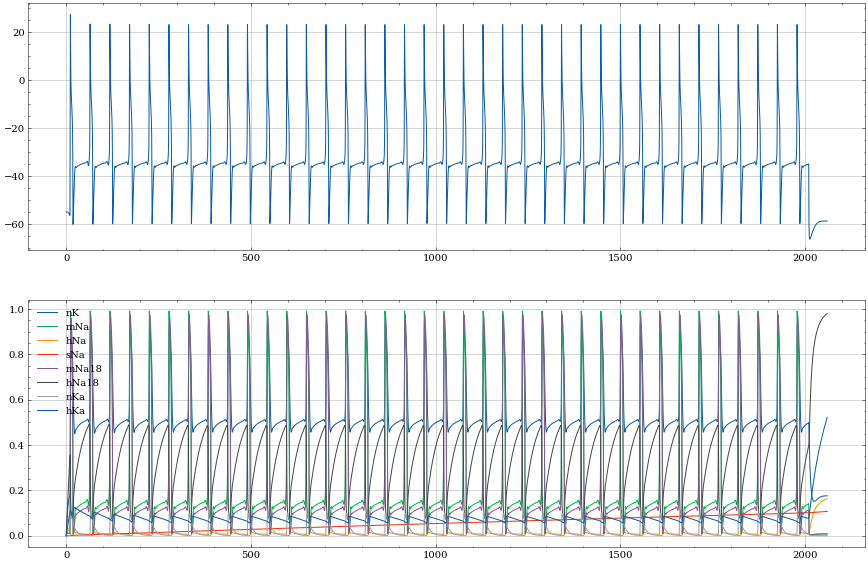

In [39]:
figure(figsize=(15, 10))
subplot(211)
plot(vmon.t/ms, vmon.v[0]/mV)
grid()
subplot(212)
for var in gatemon.record_variables:
    plot(gatemon.t/ms, getattr(gatemon, var)[0])
    
legend(gatemon.record_variables)
grid()

In [32]:
%%time
restore("init")

for cur in [1.25, 1.5, 2, 2.5]*nA:
    neuron.I = cur
    run(90*ms)
    neuron.I = 0*pA
    run(80*ms)

CPU times: user 1min 50s, sys: 1.8 s, total: 1min 51s
Wall time: 1min 56s


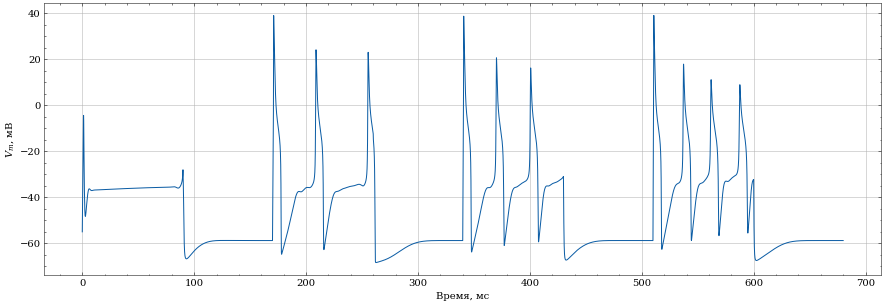

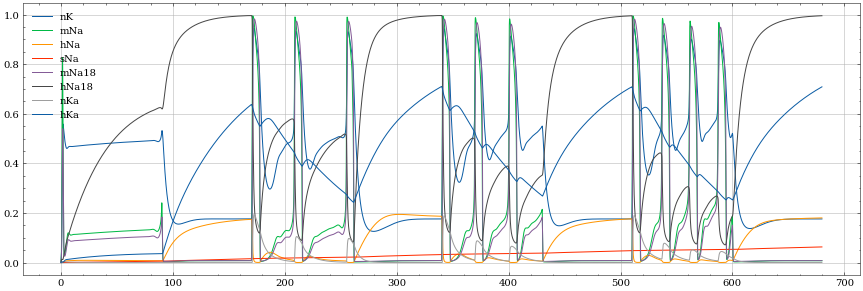

In [33]:
figure(figsize=(15, 5))
plot(vmon.t/ms, vmon.v[0]/mV)
xlabel("Время, мс")
ylabel("$V_m$, мВ")
grid()
#savefig("new_spikes.jpg", dpi=150)
figure(figsize=(15, 5))
for var in gatemon.record_variables:
    plot(gatemon.t/ms, getattr(gatemon, var)[0])
    
legend(gatemon.record_variables)
grid()

### IF curve

In [47]:
%%time
start_scope()
defaultclock.dt = 25*us

neur_num = 20
if_group = NeuronGroup(neur_num, eqs,
                       threshold="v > -20*mV",
                       refractory="v > -20*mV",
                       method="exponential_euler")
ifmon = SpikeMonitor(if_group)

if_group.v = El
if_group.I = 'i*4*nA/neur_num'

dur = 500*ms
run(dur, report="text")

Starting simulation at t=0. s for a duration of 0.5 s
230.3 ms (46%) simulated in 10s, estimated 12s remaining.
0.3992 s (79%) simulated in 20s, estimated 5s remaining.
0.5 s (100%) simulated in 25s
CPU times: user 25.5 s, sys: 213 ms, total: 25.7 s
Wall time: 25.9 s


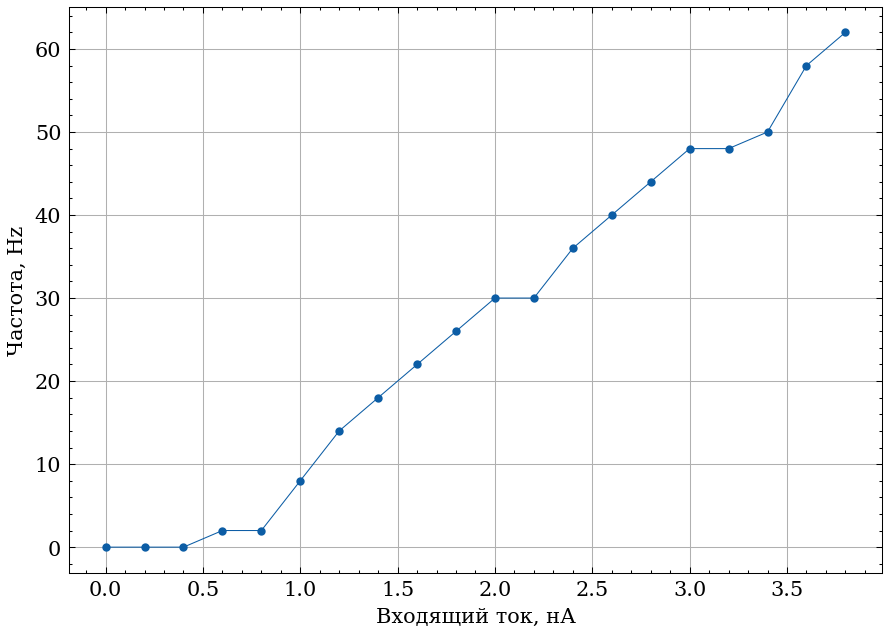

In [50]:
figure(figsize=(7, 5), dpi=150)
plot(if_group.I/nA, ifmon.count/dur, '-o', ms=3, lw=0.5)
xlabel("Входящий ток, нА")
ylabel("Частота, Hz")
grid()
savefig("new_IF_curve.jpg")

- ~построить IFr curve~
- ~собрать графики из предыдущего ноутбука~
    - меня просили немного изменить и добавить IF кривую
    - я это сделал, надо показать
- ~графики из этого ноутбука~
    - а здесь я получил новые спайки и новую IF кривую
- написать сопроводительный текст
    - я сделал как вы просили, но на уравнениях "от балды"
    - я сделал на "правильных" уравнениях
    - нашёл интересные статьи

### Nav1.8
```
ITTXR = gnaTTXR * m3 * h * (v- ena)
alpha_m = 2.85-(2.839)/(1+exp((v-1.159)/13.95))
beta_m = (7.6205)/(1+exp((v+46.463)/8.8289))

tau_h = (1.218+42.043*exp(-((v+38.1)^2)/(2*15.19^2)))
h_inf = (1)/(1 + exp((v+32.2)/4))
gnaTTXR = 0.12 mho/cm2
```

### Nav1.7
```
alpha_m =15.5/(1+exp((v-5)/(-12.08)))
beta_m = 35.2/(1+exp((v+72.7)/16.7))
 --
alpha_h = 0.38685/(1+exp((v+122.35)/15.29))
beta_h = -.00283+2.00283/(1+exp((v+5.5266)/(-12.70195)))
 --
alpha_s = .00003+(.00092)/(1+exp((v+93.9)/16.6))
beta_s = 132.05-(132.05)/(1+exp((v-384.9)/28.5))
gnaNav17 = .038 mho/cm2
```

### Kv1.1
```
mpower	1.0
m Inf	1.0000/(1+ exp((v - -30.5000)/-11.3943))
m Tau	30.0000/(1+ exp((v - -76.5600)/26.1479))
hpower	2.0
h Inf	1.0000/(1+ exp((v - -30.0000)/27.3943))
h Tau	15000.0000/(1+ exp((v - -160.5600)/-100.0000))
```

```
IKA = gkA*n*h*(v - ek)
Where gkA is the current conductance, n is the activation gate, h is the inactivation gate,
v is membrane voltage and ek is the potassium ion reversal potential.
dn/dt = (ninf-n)/ntau
dh/dt = (hinf-h)/htau
ninf = (1/(1 + exp(-(v+5.4)/16.4)))^4
ntau= (.25+10.04*exp(-((v+24.67)^2)/(2*34.8^2)))
hinf = 1/(1 + exp((v+49.9)/4.6))
htau = (20+50*exp(-((v+40)^2)/(2*40^2)))
 if htau < 5 then htau = 5
gkA = .07 mho/cm2 
```

```
IKDR = gkDR * n4 * (v - ek)
dn/dt = (ninf - n) / ntau
ninf = 1/(1+exp(-(v + 35)/15.4))
ntau = 1000 * (.000688 + 1/(exp((v+75.2)/6.5)+exp((v-131.5)/-34.8)))
 if v<-31 mV
ntau =.16 + .8*exp(-.0267 * (v +11)) if v > -31 mV
```